In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Imports

In [ ]:
import sys
sys.executable
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [ ]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting

from dtreeviz import trees 

import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import pandas as pd
import numpy as np
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.xgb_decision_tree import ShadowXGBDTree

In [ ]:
pd.options.display.max_rows = 999

In [ ]:
!pip install xgboost --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 47 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


# Train

In [ ]:
random_state = 42
dataset = pd.read_csv("https://raw.githubusercontent.com/cathrinesot/exp/main/low_high_features.csv")

features = [
      'Difficulty', 'Mistakes', 'Length', 
       'Title Polarity', 'Diversity',  'Adjectives',      
        'Joy intensity', 'Fear intensity','Sadness intensity','Anger intensity',
       'Strong subjectivity', 'first_person', 
       'Disgust', 'Anticipation', 'Trust', 'Surprise',  'Sadness','Positivity',               
                   'No Crime', 'No Sensual', 'No Animals', 'No Celebs', 
                   'img/word', 
                   'Numbers','#title_words']
target = "quality"


In [ ]:
dataset

,Difficulty,Mistakes,Length,Capitals in article,Title Polarity,Dominance,No Celebs,Diversity,Inspired,Valence,...,subjectivity,Fear,Anger,negative,char_count,Weak subjectivity,density,cadence,Polarity,quality
0,41.0,0.999450,647.0,0.0,0.165000,0.546399,2.0,7.0,13.473054,0.582296,...,0.431594,4.491018,5.389222,8.383234,3893.0,0.083333,19.760479,0.173077,0.4276,1
1,38.0,1.000000,1112.0,0.0,0.375000,0.583286,2.0,11.0,8.955224,0.604367,...,0.475748,3.198294,1.066098,10.874200,6614.0,0.095324,27.078891,0.019231,0.9995,1
2,40.0,0.999861,1358.0,0.0,0.000000,0.594242,2.0,16.0,9.667195,0.579638,...,0.435050,7.765452,3.961965,10.301109,8126.0,0.094187,27.099842,0.019231,0.9662,1
3,49.0,0.999872,1543.0,0.0,0.000000,0.566749,0.0,3.0,10.374150,0.595911,...,0.431330,5.952381,4.421769,11.054422,8775.0,0.082848,27.040816,0.038462,0.9995,1
4,48.0,1.000000,1090.0,0.0,0.100000,0.588103,0.0,10.0,12.418301,0.630723,...,0.475041,5.446623,4.575163,8.278867,6365.0,0.074312,27.233115,0.019231,0.9952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,63.0,1.000000,276.0,0.0,-0.066667,0.540287,0.0,5.0,13.375796,0.527676,...,0.331034,14.012739,10.828025,15.923567,1574.0,0.057971,25.477707,0.326923,0.9960,0
1058,57.0,1.000000,472.0,0.0,0.050000,0.521883,0.0,7.0,17.187500,0.602989,...,0.402315,4.296875,0.781250,8.203125,2669.0,0.050847,21.875000,0.365385,0.9911,0
1059,64.0,1.000000,640.0,0.0,0.250000,0.524093,2.0,6.0,11.418685,0.653152,...,0.447519,3.460208,3.806228,7.612457,3433.0,0.059375,18.685121,0.038462,0.9726,0
1060,55.0,1.000000,230.0,0.0,-0.327778,0.491475,0.0,0.0,13.380282,0.489098,...,0.549206,8.450704,4.225352,11.971831,1357.0,0.056522,19.014085,0.096154,0.9428,0


In [ ]:
dataset= dataset.dropna()

In [ ]:
dtrain = xgb.DMatrix(dataset[features], dataset[target])

In [ ]:
params = {"max_depth":4, "eta":0.05, "objective":"binary:logistic", "subsample":1, "random_state":42}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=8)

In [ ]:
xgb_model.trees_to_dataframe().query("Tree == 6")

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
174,6,0,6-0,Length,558.500000,6-1,6-2,6-1,219.408966,252.948990,NaN
175,6,1,6-1,Difficulty,47.500000,6-3,6-4,6-3,40.776474,132.017273,NaN
176,6,2,6-2,Difficulty,59.500000,6-5,6-6,6-5,83.557037,120.931717,NaN
177,6,3,6-3,Joy intensity,0.202637,6-7,6-8,6-7,10.248791,26.687988,NaN
178,6,4,6-4,img/word,0.044885,6-9,6-10,6-9,5.694000,105.329285,NaN
179,6,5,6-5,#title_words,24.500000,6-11,6-12,6-11,25.503067,97.897072,NaN
180,6,6,6-6,img/word,0.001025,6-13,6-14,6-13,10.045084,23.034641,NaN
181,6,7,6-7,Length,256.000000,6-15,6-16,6-15,8.287473,17.111530,NaN
182,6,8,6-8,Length,460.500000,6-17,6-18,6-17,5.622180,9.576457,NaN
183,6,9,6-9,Numbers,6.500000,6-19,6-20,6-19,5.410980,99.909340,NaN


# Init shadow tree

In [ ]:
d = dataset[features + [target]]
d_matrix = xgb.DMatrix(d)

In [ ]:
xgb_shadow = ShadowXGBDTree(xgb_model, 1, d[features], d[target], features, target, class_names=[0, 1])

# Visualisations classifier

## viz_leaf_samples

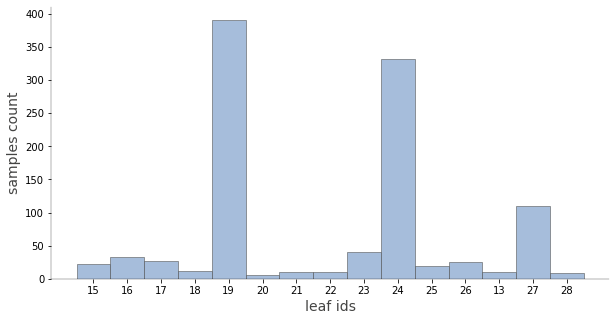

In [ ]:
trees.viz_leaf_samples(xgb_shadow)

## ctreeviz_leaf_samples

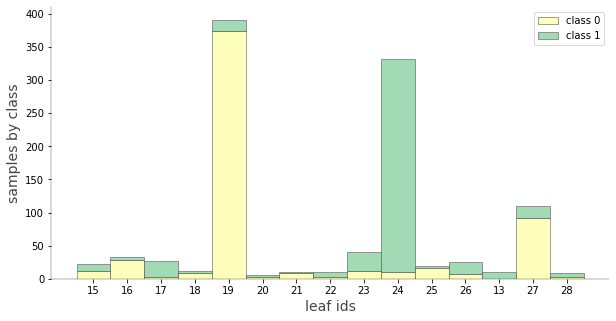

In [ ]:
trees.ctreeviz_leaf_samples(xgb_shadow)

## dtreeviz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


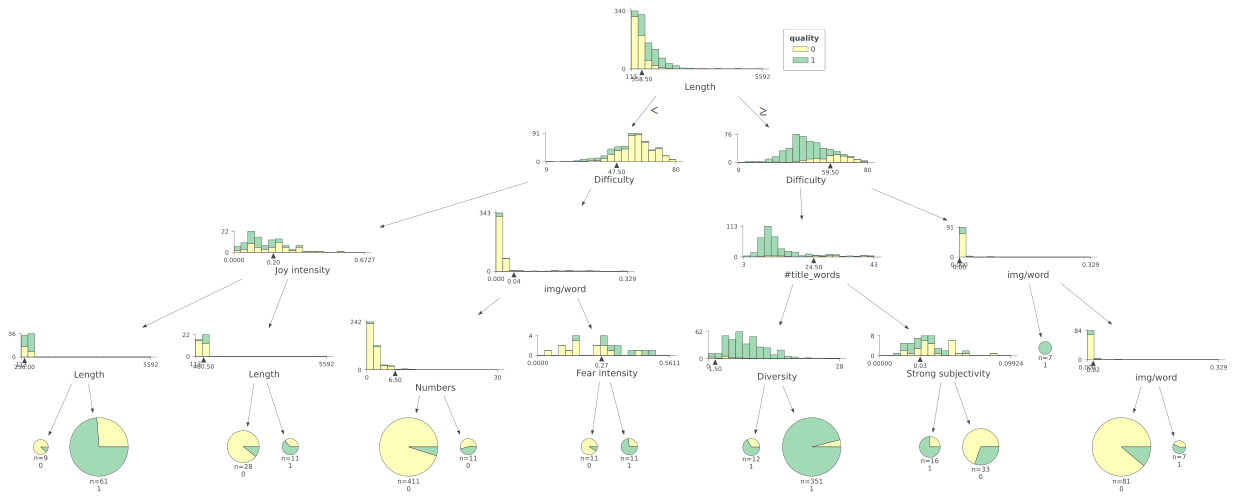

In [ ]:
trees.dtreeviz(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=6)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


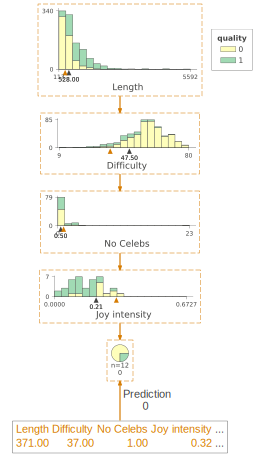

In [ ]:
trees.dtreeviz(xgb_shadow, show_just_path=True, X = dataset[features].iloc[10])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


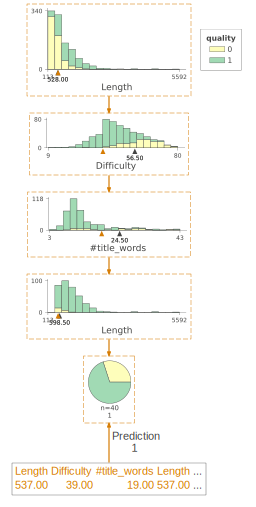

In [ ]:
trees.dtreeviz(xgb_shadow, show_just_path=True, X = dataset[features].iloc[100])

## describe_node_sample

In [ ]:
trees.describe_node_sample(xgb_model, 1, d[features], feature_names=features, tree_index=6)

,Difficulty,Mistakes,Length,Title Polarity,Diversity,Adjectives,Joy intensity,Fear intensity,Sadness intensity,Anger intensity,...,Surprise,Sadness,Positivity,No Crime,No Sensual,No Animals,No Celebs,img/word,Numbers,#title_words
count,553.000000,553.000000,553.00000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,...,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,56.177215,0.999195,363.43038,-0.048767,2.486438,0.555883,0.188545,0.209992,0.149662,0.134588,...,2.449927,4.257598,10.150418,2.294756,0.759494,1.110307,0.307414,0.019761,1.857143,14.929476
std,11.134279,0.004945,108.21742,0.273696,1.751887,0.058553,0.111894,0.125075,0.092177,0.097882,...,1.669667,2.770640,3.998219,3.111152,1.694521,2.883697,1.186991,0.037773,1.976178,5.530916
min,9.000000,0.891586,113.00000,-1.000000,0.000000,0.415984,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.636943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,0.999589,278.00000,-0.125000,1.000000,0.515991,0.101767,0.107455,0.075294,0.054500,...,1.219512,2.040816,7.100592,0.000000,0.000000,0.000000,0.000000,0.006148,0.000000,11.000000
50%,57.000000,1.000000,367.00000,0.000000,2.000000,0.551020,0.169976,0.190600,0.139406,0.113182,...,2.116402,3.703704,9.547739,1.000000,0.000000,0.000000,0.000000,0.010695,1.000000,13.000000
75%,64.000000,1.000000,450.00000,0.000000,3.000000,0.589041,0.248963,0.300333,0.207125,0.198914,...,3.319502,6.091371,12.755102,3.000000,1.000000,1.000000,0.000000,0.016949,3.000000,16.000000
max,80.000000,1.000000,558.00000,0.800000,9.000000,0.760274,0.672750,0.561125,0.454800,0.449893,...,9.375000,15.503876,28.915663,18.000000,13.000000,29.000000,23.000000,0.329032,12.000000,41.000000


In [ ]:
trees.describe_node_sample(xgb_shadow, 1)

,Difficulty,Mistakes,Length,Title Polarity,Diversity,Adjectives,Joy intensity,Fear intensity,Sadness intensity,Anger intensity,...,Surprise,Sadness,Positivity,No Crime,No Sensual,No Animals,No Celebs,img/word,Numbers,#title_words
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,...,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.00000
mean,56.582846,0.999192,349.397661,-0.046557,2.364522,0.560438,0.189487,0.210895,0.149051,0.133744,...,2.452652,4.187967,10.087241,2.231969,0.754386,1.175439,0.288499,0.020162,1.766082,14.88694
std,10.857631,0.005096,99.461626,0.276354,1.683348,0.057751,0.113223,0.125426,0.091692,0.097731,...,1.682475,2.689721,4.020075,2.993285,1.713374,2.981129,1.200018,0.038744,1.862421,5.44709
min,9.000000,0.891586,113.000000,-1.000000,0.000000,0.415984,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.636943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.00000
25%,51.000000,0.999589,274.000000,-0.125000,1.000000,0.521445,0.101209,0.107455,0.076611,0.053000,...,1.214575,2.040816,7.017544,0.000000,0.000000,0.000000,0.000000,0.006536,0.000000,11.00000
50%,57.000000,1.000000,356.000000,0.000000,2.000000,0.555012,0.172045,0.194550,0.139300,0.112421,...,2.097902,3.669725,9.482759,1.000000,0.000000,0.000000,0.000000,0.010870,1.000000,13.00000
75%,64.000000,1.000000,431.000000,0.000000,3.000000,0.592453,0.249600,0.300455,0.207086,0.197914,...,3.345725,5.990783,12.676056,3.000000,1.000000,1.000000,0.000000,0.017021,3.000000,16.00000
max,80.000000,1.000000,527.000000,0.800000,9.000000,0.760274,0.672750,0.561125,0.454800,0.449893,...,9.375000,13.089005,28.915663,18.000000,13.000000,29.000000,23.000000,0.329032,11.000000,41.00000


## explain_prediction_path

In [ ]:
X = dataset[features].iloc[10]

In [ ]:
X

Difficulty              37.000000
Mistakes                 1.000000
Length                 371.000000
Title Polarity           0.200000
Diversity                7.000000
Adjectives               0.471698
Joy intensity            0.315208
Fear intensity           0.046542
Sadness intensity        0.025667
Anger intensity          0.018875
Strong subjectivity      0.048518
first_person           374.663073
Disgust                  1.142857
Anticipation             6.285714
Trust                   14.285714
Surprise                 6.285714
Sadness                  1.714286
Positivity              18.285714
No Crime                 0.000000
No Sensual               0.000000
No Animals               2.000000
No Celebs                1.000000
img/word                 0.137466
Numbers                  4.000000
#title_words            11.000000
Name: 10, dtype: float64

In [ ]:
print(trees.explain_prediction_path(xgb_model, X, dataset[features], dataset[target], explanation_type="plain_english", feature_names=features, tree_index=6))

Difficulty < 47.5
Length < 460.5
0.2 <= Joy intensity 



In [ ]:
print(trees.explain_prediction_path(xgb_shadow, X, explanation_type="plain_english"))

Difficulty < 47.5
Length < 528.0
0.21 <= Joy intensity 
0.5 <= No Celebs 

